In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
df_raw = pd.read_csv('../data/preprocessing/raw_covid_five_states_cases_time_series.csv')

In [50]:
df_raw

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
13154,2020-10-27,Virginia,51,175409,3600
13155,2020-10-27,Washington,53,108966,2438
13156,2020-10-27,West Virginia,54,22706,432
13157,2020-10-27,Wisconsin,55,217447,1896


In [51]:
df_raw['date'] = pd.to_datetime(df_raw['date'])

In [53]:
df_raw = df_raw.set_index('date')

In [54]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13159 entries, 2020-01-21 to 2020-10-27
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   state   13159 non-null  object
 1   fips    13159 non-null  int64 
 2   cases   13159 non-null  int64 
 3   deaths  13159 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 514.0+ KB


In [60]:
df_tx = df_raw[df_raw['state'].str.contains('Texas')]
df_tx.index.min(), df_tx.index.max()

(Timestamp('2020-02-12 00:00:00'), Timestamp('2020-10-27 00:00:00'))

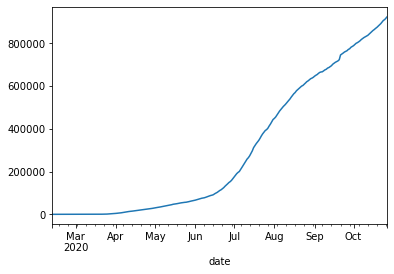

In [88]:
df_tx['cases'].plot();

In [61]:
df_fl = df_raw[df_raw['state'].str.contains('Florida')]
df_fl.index.min(), df_fl.index.max()

(Timestamp('2020-03-01 00:00:00'), Timestamp('2020-10-27 00:00:00'))

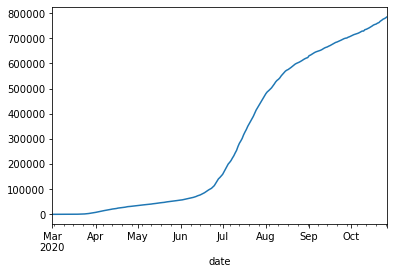

In [89]:
df_fl['cases'].plot();

In [62]:
df_ny = df_raw[df_raw['state'].str.contains('New York')]
df_ny.index.min(), df_ny.index.max()

(Timestamp('2020-03-01 00:00:00'), Timestamp('2020-10-27 00:00:00'))

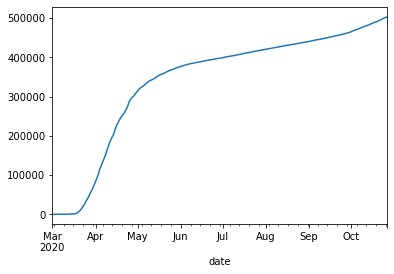

In [90]:
df_ny['cases'].plot();

In [63]:
df_il = df_raw[df_raw['state'].str.contains('Illinois')]
df_il.index.min(), df_il.index.max()

(Timestamp('2020-01-24 00:00:00'), Timestamp('2020-10-27 00:00:00'))

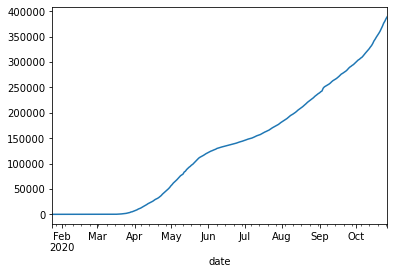

In [91]:
df_il['cases'].plot();

In [64]:
df_ca = df_raw[df_raw['state'].str.contains('California')]
df_ca.index.min(), df_ca.index.max()

(Timestamp('2020-01-25 00:00:00'), Timestamp('2020-10-27 00:00:00'))

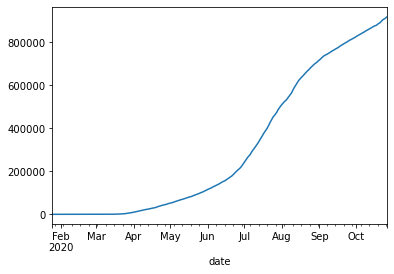

In [92]:
df_ca['cases'].plot();

In [82]:
df = pd.concat([df_ca, df_fl, df_il, df_ny, df_tx])

In [83]:
df = df.loc['2020-03-01':]

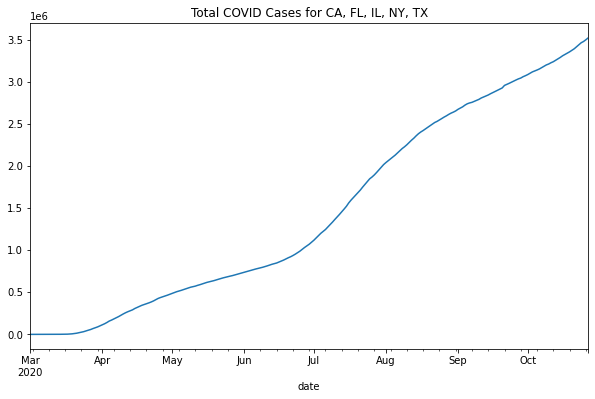

In [98]:
plt.figure(figsize=(10,6))
plt.title('Total COVID Cases for CA, FL, IL, NY, TX')
df.groupby(df.index)['cases'].sum().plot();

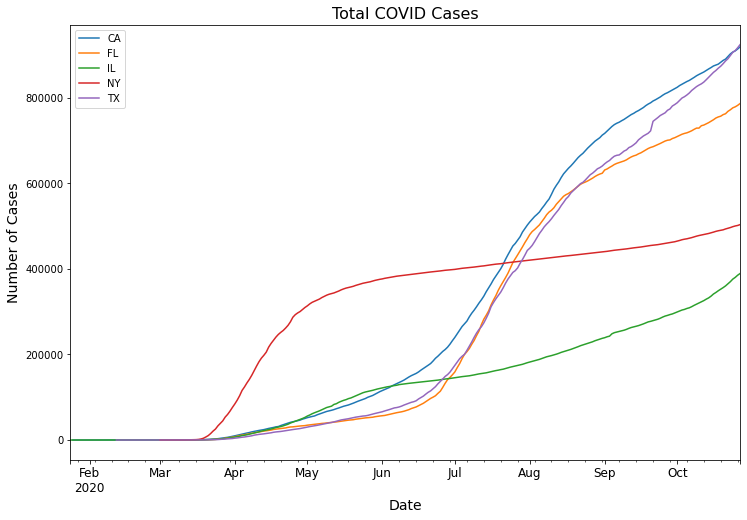

In [114]:
plt.figure(figsize=(12,8))
df_ca['cases'].plot(label='CA')
df_fl['cases'].plot(label='FL')
df_il['cases'].plot(label='IL')
df_ny['cases'].plot(label='NY')
df_tx['cases'].plot(label='TX')
plt.title('Total COVID Cases', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Cases', fontsize=14)
plt.xticks(fontsize=12)
plt.legend();